In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy

In [ ]:
df = pd.read_csv('loan_data_set.csv')

In [ ]:
print(df.shape)

(614, 13)


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Data Exploration**

**1. Categorical Variable**

Loan ID

In [ ]:
df.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Gender

In [ ]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

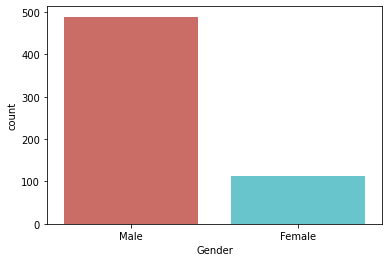

In [ ]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

In [ ]:
countMale = len(df[df.Gender == 'Male'])
countFemale = len(df[df.Gender == 'Female'])
countNull = len(df[df.Gender.isnull()])

print("Percentage of Male applicant: {:.2f}%".format((countMale / (len(df.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Gender))*100)))

Percentage of Male applicant: 79.64%
Percentage of Female applicant: 18.24%
Missing values percentage: 2.12%


Married

In [ ]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

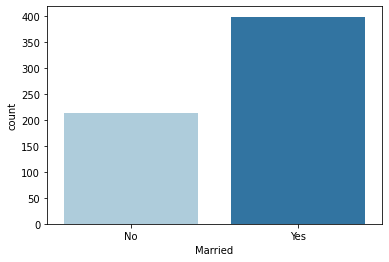

In [ ]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()

In [ ]:
countMarried = len(df[df.Married == 'Yes'])
countNotMarried = len(df[df.Married == 'No'])
countNull = len(df[df.Married.isnull()])

print("Percentage of married: {:.2f}%".format((countMarried / (len(df.Married))*100)))
print("Percentage of Not married applicant: {:.2f}%".format((countNotMarried / (len(df.Married))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Married))*100)))

Percentage of married: 64.82%
Percentage of Not married applicant: 34.69%
Missing values percentage: 0.49%


Education

In [ ]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

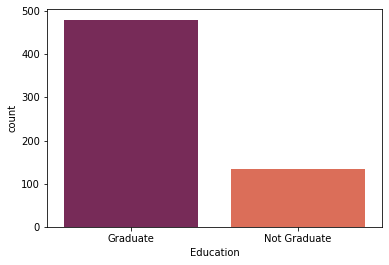

In [ ]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

In [ ]:
countGraduate = len(df[df.Education == 'Graduate'])
countNotGraduate = len(df[df.Education == 'Not Graduate'])
countNull = len(df[df.Education.isnull()])

print("Percentage of graduate applicant: {:.2f}%".format((countGraduate / (len(df.Education))*100)))
print("Percentage of Not graduate applicant: {:.2f}%".format((countNotGraduate / (len(df.Education))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Education))*100)))

Percentage of graduate applicant: 78.18%
Percentage of Not graduate applicant: 21.82%
Missing values percentage: 0.00%


Self Employed

In [ ]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

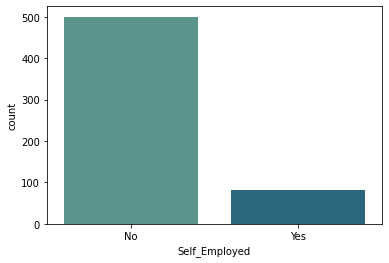

In [ ]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

In [ ]:
countNo = len(df[df.Self_Employed == 'No'])
countYes = len(df[df.Self_Employed == 'Yes'])
countNull = len(df[df.Self_Employed.isnull()])

print("Percentage of Not self employed: {:.2f}%".format((countNo / (len(df.Self_Employed))*100)))
print("Percentage of self employed: {:.2f}%".format((countYes / (len(df.Self_Employed))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Self_Employed))*100)))

Percentage of Not self employed: 81.43%
Percentage of self employed: 13.36%
Missing values percentage: 5.21%


Credit History

In [ ]:
df.Credit_History.value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

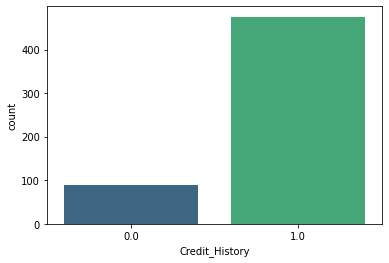

In [ ]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

In [ ]:
count1 = len(df[df.Credit_History == 1])
count0 = len(df[df.Credit_History == 0])
countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.2f}%".format((count1 / (len(df.Credit_History))*100)))
print("Percentage of Bad credit history: {:.2f}%".format((count0 / (len(df.Credit_History))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

Percentage of Good credit history: 77.36%
Percentage of Bad credit history: 14.50%
Missing values percentage: 8.14%


Property Area

In [ ]:
df.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

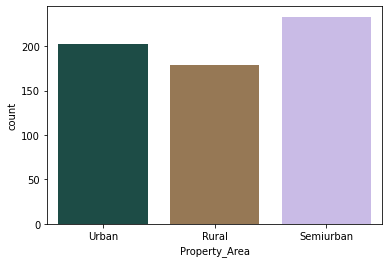

In [ ]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

In [ ]:
countUrban = len(df[df.Property_Area == 'Urban'])
countRural = len(df[df.Property_Area == 'Rural'])
countSemiurban = len(df[df.Property_Area == 'Semiurban'])
countNull = len(df[df.Property_Area.isnull()])

print("Percentage of Urban: {:.2f}%".format((countUrban / (len(df.Property_Area))*100)))
print("Percentage of Rural: {:.2f}%".format((countRural / (len(df.Property_Area))*100)))
print("Percentage of Semiurban: {:.2f}%".format((countSemiurban / (len(df.Property_Area))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Property_Area))*100)))

Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of Semiurban: 37.95%
Missing values percentage: 0.00%


Loan Status

In [ ]:
df.Loan_Status.value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

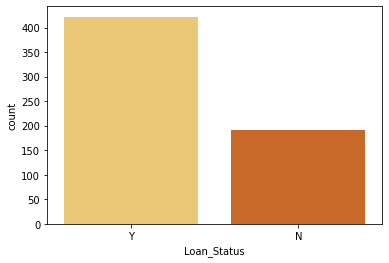

In [ ]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

In [ ]:
countY = len(df[df.Loan_Status == 'Y'])
countN = len(df[df.Loan_Status == 'N'])
countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.2f}%".format((countY / (len(df.Loan_Status))*100)))
print("Percentage of Rejected: {:.2f}%".format((countN / (len(df.Loan_Status))*100)))
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

Percentage of Approved: 68.73%
Percentage of Rejected: 31.27%
Missing values percentage: 0.00%


Loan Amount Term

In [ ]:
df.Loan_Amount_Term.value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

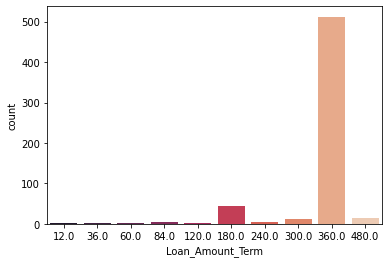

In [ ]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()

In [ ]:
countNull = len(df[df.Loan_Amount_Term.isnull()])
print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Amount_Term))*100)))

Missing values percentage: 2.28%


**2. Describing Numerical Variable**

In [ ]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


Histogram Distribution

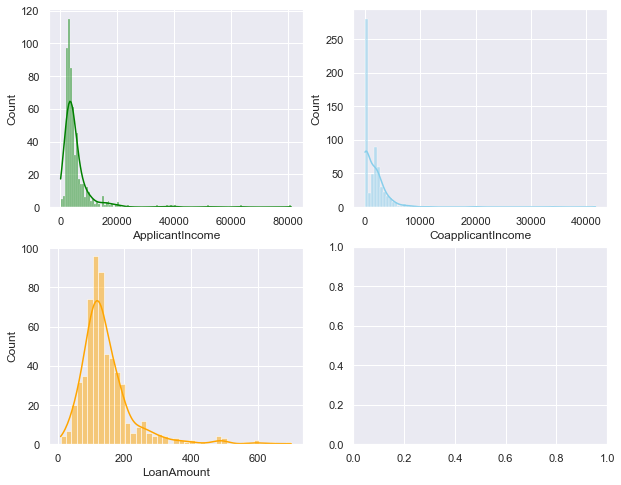

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

Violin Plot

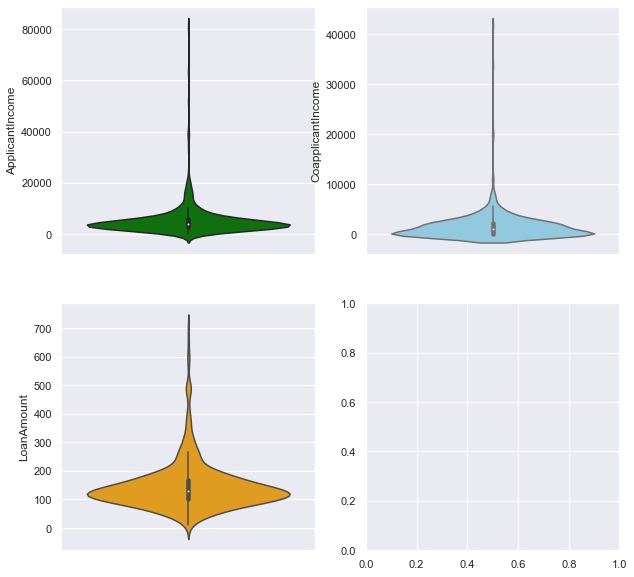

In [ ]:
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(10, 10))

sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 0], color='orange');

**Additional exploration**

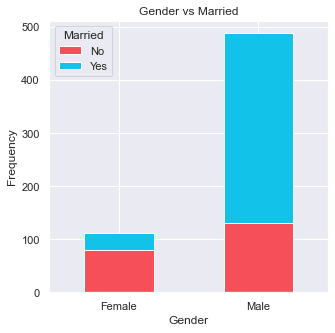

In [ ]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married.

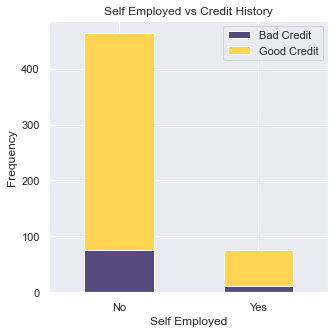

In [ ]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

Most not self employed applicants have good credit compared to self employed applicants.

**Data Preprocessing**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df['Loan_Status']
x=df.drop(['Loan_Status','Loan_ID'], axis=1)
x=pd.get_dummies(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [ ]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


**Training**

In [ ]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [ ]:
voting=[]

**1. CatBoost Classifier**

In [ ]:
model = CatBoostClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
voting.append(y_pred)

Learning rate set to 0.007604
0:	learn: 0.6886926	total: 2.66ms	remaining: 2.66s
1:	learn: 0.6847217	total: 5.46ms	remaining: 2.72s
2:	learn: 0.6805030	total: 8.28ms	remaining: 2.75s
3:	learn: 0.6767234	total: 10.9ms	remaining: 2.72s
4:	learn: 0.6728391	total: 13.2ms	remaining: 2.63s
5:	learn: 0.6694283	total: 14.1ms	remaining: 2.34s
6:	learn: 0.6658005	total: 16.1ms	remaining: 2.28s
7:	learn: 0.6624611	total: 16.9ms	remaining: 2.09s
8:	learn: 0.6592506	total: 17.7ms	remaining: 1.95s
9:	learn: 0.6558939	total: 18.6ms	remaining: 1.84s
10:	learn: 0.6520082	total: 19.6ms	remaining: 1.76s
11:	learn: 0.6485083	total: 20.7ms	remaining: 1.71s
12:	learn: 0.6452067	total: 21.5ms	remaining: 1.63s
13:	learn: 0.6415843	total: 22.3ms	remaining: 1.57s
14:	learn: 0.6383121	total: 23ms	remaining: 1.51s
15:	learn: 0.6349068	total: 23.5ms	remaining: 1.44s
16:	learn: 0.6318248	total: 24.2ms	remaining: 1.4s
17:	learn: 0.6289118	total: 24.5ms	remaining: 1.34s
18:	learn: 0.6257185	total: 25.2ms	remaining: 1

263:	learn: 0.3898067	total: 191ms	remaining: 531ms
264:	learn: 0.3896051	total: 191ms	remaining: 530ms
265:	learn: 0.3892808	total: 192ms	remaining: 529ms
266:	learn: 0.3888059	total: 193ms	remaining: 529ms
267:	learn: 0.3885991	total: 193ms	remaining: 528ms
268:	learn: 0.3882682	total: 194ms	remaining: 528ms
269:	learn: 0.3877225	total: 195ms	remaining: 527ms
270:	learn: 0.3874407	total: 196ms	remaining: 526ms
271:	learn: 0.3871529	total: 196ms	remaining: 526ms
272:	learn: 0.3870973	total: 197ms	remaining: 524ms
273:	learn: 0.3868637	total: 197ms	remaining: 523ms
274:	learn: 0.3865029	total: 198ms	remaining: 522ms
275:	learn: 0.3861049	total: 199ms	remaining: 522ms
276:	learn: 0.3857446	total: 200ms	remaining: 522ms
277:	learn: 0.3854171	total: 201ms	remaining: 522ms
278:	learn: 0.3848829	total: 202ms	remaining: 521ms
279:	learn: 0.3843801	total: 202ms	remaining: 521ms
280:	learn: 0.3838047	total: 203ms	remaining: 520ms
281:	learn: 0.3834408	total: 204ms	remaining: 520ms
282:	learn: 

523:	learn: 0.3171681	total: 381ms	remaining: 346ms
524:	learn: 0.3169741	total: 382ms	remaining: 345ms
525:	learn: 0.3167287	total: 383ms	remaining: 345ms
526:	learn: 0.3165825	total: 383ms	remaining: 344ms
527:	learn: 0.3164425	total: 384ms	remaining: 343ms
528:	learn: 0.3161304	total: 385ms	remaining: 343ms
529:	learn: 0.3160041	total: 386ms	remaining: 342ms
530:	learn: 0.3158545	total: 386ms	remaining: 341ms
531:	learn: 0.3156010	total: 387ms	remaining: 340ms
532:	learn: 0.3154175	total: 388ms	remaining: 340ms
533:	learn: 0.3152318	total: 389ms	remaining: 339ms
534:	learn: 0.3149655	total: 389ms	remaining: 338ms
535:	learn: 0.3148270	total: 390ms	remaining: 338ms
536:	learn: 0.3145310	total: 391ms	remaining: 337ms
537:	learn: 0.3143093	total: 391ms	remaining: 336ms
538:	learn: 0.3142839	total: 392ms	remaining: 335ms
539:	learn: 0.3140483	total: 393ms	remaining: 334ms
540:	learn: 0.3137884	total: 393ms	remaining: 334ms
541:	learn: 0.3135619	total: 394ms	remaining: 333ms
542:	learn: 

785:	learn: 0.2666903	total: 572ms	remaining: 156ms
786:	learn: 0.2664726	total: 573ms	remaining: 155ms
787:	learn: 0.2663712	total: 574ms	remaining: 154ms
788:	learn: 0.2661537	total: 575ms	remaining: 154ms
789:	learn: 0.2660530	total: 576ms	remaining: 153ms
790:	learn: 0.2657745	total: 576ms	remaining: 152ms
791:	learn: 0.2656708	total: 577ms	remaining: 152ms
792:	learn: 0.2654416	total: 578ms	remaining: 151ms
793:	learn: 0.2653514	total: 579ms	remaining: 150ms
794:	learn: 0.2652754	total: 579ms	remaining: 149ms
795:	learn: 0.2651055	total: 580ms	remaining: 149ms
796:	learn: 0.2649032	total: 581ms	remaining: 148ms
797:	learn: 0.2646765	total: 581ms	remaining: 147ms
798:	learn: 0.2644575	total: 582ms	remaining: 146ms
799:	learn: 0.2643292	total: 583ms	remaining: 146ms
800:	learn: 0.2639363	total: 584ms	remaining: 145ms
801:	learn: 0.2638695	total: 585ms	remaining: 144ms
802:	learn: 0.2636330	total: 585ms	remaining: 144ms
803:	learn: 0.2633826	total: 586ms	remaining: 143ms
804:	learn: 

0.7642276422764228


**2. XGBoost Classifier**

In [ ]:
model = XGBClassifier(tree_method="gpu_hist")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
voting.append(y_pred)

/home/amrha/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:56:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7479674796747967


**3. Light GBM Classifier**

In [ ]:
model = LGBMClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
voting.append(y_pred)

0.7723577235772358


In [ ]:
y_pred=[]
for i in range(len(voting[0])):
    y_pred.append(max(set([voting[0][i],voting[1][i],voting[2][i]]), key=[voting[0][i],voting[1][i],voting[2][i]].count))
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7560975609756098


In [ ]:
model.booster_.save_model('model.txt')